# Regression - FFNN - one_hot

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [2]:
df = pd.read_csv('reg_data/abalone.data',
                 names=['Sex','Length','Diameter','Height','Whole weight','Shucked weight','Viscera weight','Shell weight','Rings'])

In [3]:
from sklearn.model_selection import train_test_split

In [4]:
df['Sex'] = df['Sex'].replace(('I','M','F'),(3,1,2))

X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [5]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## Build Model

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
dummy = pd.get_dummies(df['Sex'])
dummy.head()

df = pd.concat([df.iloc[:,0], dummy, df.iloc[:,1:]], axis=1)

X = df.iloc[:,1:-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [8]:
df.head()

,Sex,1,2,3,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,1,0,0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,1,0,0,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,2,0,1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,1,0,0,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,3,0,0,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential()
model.add(Dense(32, input_shape=(10,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))

In [11]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                352       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 10,913
Trainable params: 10,913
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 400us/sample - loss: 69.3134 - mae: 7.6192 - val_loss: 21.3496 - val_mae: 3.6959
Epoch 2/100
3341/3341 [==============================] - 0s 48us/sample - loss: 10.1369 - mae: 2.4045 - val_loss: 8.2887 - val_mae: 1.9161
Epoch 3/100
3341/3341 [==============================] - 0s 49us/sample - loss: 7.1007 - mae: 1.9052 - val_loss: 7.4171 - val_mae: 1.8776
Epoch 4/100
3341/3341 [==============================] - 0s 51us/sample - loss: 6.7007 - mae: 1.8661 - val_loss: 7.2786 - val_mae: 1.8357
Epoch 5/100
3341/3341 [==============================] - 0s 50us/sample - loss: 6.5319 - mae: 1.8526 - val_loss: 7.2767 - val_mae: 1.7951
Epoch 6/100
3341/3341 [==============================] - 0s 49us/sample - loss: 6.4420 - mae: 1.8323 - val_loss: 7.1736 - val_mae: 1.7795
Epoch 7/100
3341/3341 [==============================] - 0s 63us/sample - loss: 6.3489 - mae: 1.8275 - val_loss: 7.1284 -

3341/3341 [==============================] - 0s 93us/sample - loss: 4.3656 - mae: 1.4779 - val_loss: 4.7494 - val_mae: 1.5117
Epoch 60/100
3341/3341 [==============================] - 0s 71us/sample - loss: 4.3585 - mae: 1.4807 - val_loss: 5.1297 - val_mae: 1.5345
Epoch 61/100
3341/3341 [==============================] - 0s 54us/sample - loss: 4.3764 - mae: 1.4825 - val_loss: 4.8498 - val_mae: 1.5378
Epoch 62/100
3341/3341 [==============================] - 0s 53us/sample - loss: 4.3659 - mae: 1.4744 - val_loss: 4.7174 - val_mae: 1.5585
Epoch 63/100
3341/3341 [==============================] - 0s 62us/sample - loss: 4.4183 - mae: 1.4982 - val_loss: 4.6866 - val_mae: 1.5274
Epoch 64/100
3341/3341 [==============================] - 0s 68us/sample - loss: 4.3885 - mae: 1.4907 - val_loss: 4.8882 - val_mae: 1.5163
Epoch 65/100
3341/3341 [==============================] - 0s 77us/sample - loss: 4.4404 - mae: 1.4891 - val_loss: 5.2265 - val_mae: 1.5470
Epoch 66/100
3341/3341 [================

In [14]:
y_pred = model.predict(X_test)

## Evaluate

In [17]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.982772313321918
RMSE :      2.2322124256714275
r2_score :  0.55596821089237


## Model 2 : increase param

In [18]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1))

In [19]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 512)               5632      
_________________________________________________________________
dense_5 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_6 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_7 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_8 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_9 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                

In [21]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 336us/sample - loss: 26.0467 - mae: 3.7895 - val_loss: 7.6992 - val_mae: 2.1133
Epoch 2/100
3341/3341 [==============================] - 0s 122us/sample - loss: 7.5946 - mae: 2.0295 - val_loss: 8.2337 - val_mae: 1.8269
Epoch 3/100
3341/3341 [==============================] - 0s 109us/sample - loss: 6.2797 - mae: 1.8040 - val_loss: 6.8286 - val_mae: 1.7064
Epoch 4/100
3341/3341 [==============================] - 0s 117us/sample - loss: 5.6450 - mae: 1.6975 - val_loss: 5.6348 - val_mae: 1.6692
Epoch 5/100
3341/3341 [==============================] - 0s 113us/sample - loss: 5.1077 - mae: 1.6189 - val_loss: 5.7276 - val_mae: 1.6074
Epoch 6/100
3341/3341 [==============================] - 0s 112us/sample - loss: 4.9842 - mae: 1.6084 - val_loss: 5.6328 - val_mae: 1.5891
Epoch 7/100
3341/3341 [==============================] - 0s 120us/sample - loss: 4.9881 - mae: 1.6024 - val_loss: 4.90

3341/3341 [==============================] - 0s 107us/sample - loss: 4.3361 - mae: 1.4790 - val_loss: 4.6389 - val_mae: 1.6094
Epoch 60/100
3341/3341 [==============================] - 0s 111us/sample - loss: 4.4212 - mae: 1.5003 - val_loss: 5.3047 - val_mae: 1.5488
Epoch 61/100
3341/3341 [==============================] - 0s 109us/sample - loss: 4.5300 - mae: 1.5132 - val_loss: 5.4657 - val_mae: 1.5570
Epoch 62/100
3341/3341 [==============================] - 0s 107us/sample - loss: 4.2783 - mae: 1.4666 - val_loss: 4.5484 - val_mae: 1.5260
Epoch 63/100
3341/3341 [==============================] - 0s 107us/sample - loss: 4.2319 - mae: 1.4621 - val_loss: 4.7030 - val_mae: 1.5737
Epoch 64/100
3341/3341 [==============================] - 0s 110us/sample - loss: 4.2535 - mae: 1.4778 - val_loss: 4.6252 - val_mae: 1.5091
Epoch 65/100
3341/3341 [==============================] - 0s 112us/sample - loss: 4.3848 - mae: 1.4760 - val_loss: 4.6462 - val_mae: 1.5172
Epoch 66/100
3341/3341 [=========

In [22]:
y_pred = model.predict(X_test)

## Evaluate

In [23]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [24]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       4.6271302268924615
RMSE :      2.151076527437474
r2_score :  0.587660686885511


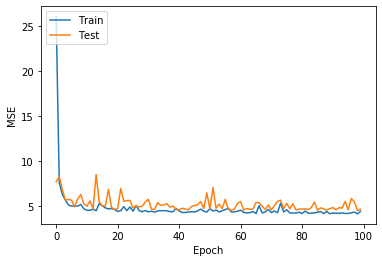

In [25]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Model 3

In [26]:
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(10,)))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='linear'))

In [27]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 512)               5632      
_________________________________________________________________
dense_12 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_13 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_14 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_15 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_16 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_17 (Dense)             (None, 1)                

In [29]:
epochs = 100
batch_size=128

history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=[X_test, y_test])

Train on 3341 samples, validate on 836 samples
Epoch 1/100
3341/3341 [==============================] - 1s 382us/sample - loss: 26.6681 - mae: 3.8194 - val_loss: 8.0511 - val_mae: 1.8622
Epoch 2/100
3341/3341 [==============================] - 0s 117us/sample - loss: 6.7773 - mae: 1.8936 - val_loss: 7.0898 - val_mae: 1.7684
Epoch 3/100
3341/3341 [==============================] - 0s 111us/sample - loss: 6.0254 - mae: 1.7618 - val_loss: 6.1224 - val_mae: 1.7686
Epoch 4/100
3341/3341 [==============================] - 0s 108us/sample - loss: 5.4943 - mae: 1.6889 - val_loss: 6.8898 - val_mae: 1.7303
Epoch 5/100
3341/3341 [==============================] - 0s 113us/sample - loss: 5.0650 - mae: 1.6037 - val_loss: 5.2414 - val_mae: 1.7398
Epoch 6/100
3341/3341 [==============================] - 0s 106us/sample - loss: 4.7946 - mae: 1.5765 - val_loss: 4.8368 - val_mae: 1.6301
Epoch 7/100
3341/3341 [==============================] - 0s 122us/sample - loss: 4.7296 - mae: 1.5560 - val_loss: 4.94

Epoch 59/100
3341/3341 [==============================] - 0s 103us/sample - loss: 5.6830 - mae: 1.7115 - val_loss: 6.8963 - val_mae: 2.1591
Epoch 60/100
3341/3341 [==============================] - 0s 103us/sample - loss: 5.1977 - mae: 1.6524 - val_loss: 5.1696 - val_mae: 1.5325
Epoch 61/100
3341/3341 [==============================] - 0s 112us/sample - loss: 4.3702 - mae: 1.4756 - val_loss: 4.6202 - val_mae: 1.5481
Epoch 62/100
3341/3341 [==============================] - 0s 103us/sample - loss: 4.2749 - mae: 1.4761 - val_loss: 5.9625 - val_mae: 1.6372
Epoch 63/100
3341/3341 [==============================] - 0s 103us/sample - loss: 4.3103 - mae: 1.4723 - val_loss: 4.5063 - val_mae: 1.4835
Epoch 64/100
3341/3341 [==============================] - 0s 103us/sample - loss: 4.3349 - mae: 1.4860 - val_loss: 6.8575 - val_mae: 1.7929
Epoch 65/100
3341/3341 [==============================] - 0s 108us/sample - loss: 4.6073 - mae: 1.5301 - val_loss: 5.1698 - val_mae: 1.5347
Epoch 66/100
3341/33

In [30]:
y_pred = model.predict(X_test)

## Evaluate

In [31]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2

In [32]:
print('Score')
print('MSE :      ', mse(y_test, y_pred))
print('RMSE :     ', np.sqrt(mse(y_test, y_pred)))
print('r2_score : ', r2(y_test, y_pred))

Score
MSE :       5.109205739663165
RMSE :      2.2603552242209997
r2_score :  0.5447012982238513


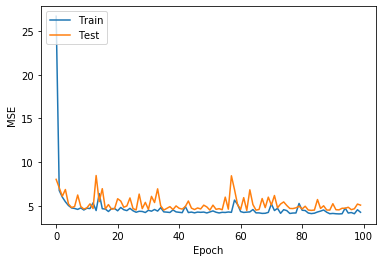

In [33]:
# Plot training & validation accuracy values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()